# Project: Write a Data Science Blog Post

# Section 1: Business Understanding

The purpose of this exercise is to determine what insight we can obtain from Sales Data from a superstore.
Data Set is available at https://www.kaggle.com/datasets/vivek468/superstore-dataset-final
The file'Sample - Superstore.csv' was renamed to 'Sample.csv'

Questions:
1. What are the most profitable product groups?
2. What would the sales performace be without discounts?
3. What is the recomendation regarding discount policy?

In [461]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Section 2: Data Understanding

Gather

In [462]:
df = pd.read_csv (r'~\Downloads\Sample.csv')
print('Data set has the following number of rows and columns: ',df.shape)

Data set has the following number of rows and columns:  (9994, 21)


# Section 3: Data Preparation

Shall  add the following fields for our analysis:  
_Period: Determines which year sales where made_  
_Sales2: The amount of Sales had there been no discount (we assume that lack of discount does not reduce sales)_  
_Profit2: The amount of profit had there been no discount (we assume that lack of discount does not reduce sales)_  

In [463]:
#Add additional fields
df["Period"]=df['Order Date'].str[-4:]# Add Year to the Data Set as string
df["Sales2"]=df["Sales"]/(1-df["Discount"])
df["Profit2"]=df["Profit"]+df["Sales2"]-df["Sales"]


At this point we will focus on data from 2017

In [464]:
#Let us filter only 2017
Is_2017 =  df['Period']=='2017'
#print(Is_2017.head())
#print(Is_2017)

In [465]:
Data2017=df[Is_2017]
print('After filtering for 2017, Data set now has the following number of rows and columns: ',Data2017.shape)

After filtering for 2017, Data set now has the following number of rows and columns:  (3312, 24)


In [466]:
#Let us filter only the Sales with Positive Profit
Is_Profitable =  Data2017['Profit']>0
#print(Is_Profitable.head())

In [467]:
Data2017Profit=Data2017[Is_Profitable]
print('After removing unprofitable transactions, Data set now has the following number of rows and columns: ',Data2017Profit.shape)

After removing unprofitable transactions, Data set now has the following number of rows and columns:  (2673, 24)


In [468]:
#This will be used later on to compare current profitability with final result
ii=Data2017.groupby(['Sub-Category'])[['Profit2','Profit']].apply(sum)
#print(ii)

In [469]:
#This will be used later on to compare final result with series that was unmodified for profitability
iii=Data2017Profit.groupby(['Sub-Category'])[['Profit']].apply(sum)
#print(iii)

In [470]:
#Calculates Profit Comparison Between no discounts and normal profit
ii["Output"]=0
cc=ii.groupby(['Output'])[['Profit2','Profit']].apply(sum)
cc["Var%"]=cc["Profit2"]/cc["Profit"]-1
#print('Profit Comparison')
#print(cc)

In [471]:
#Add profit in order to compare to originaL profit
iii["Original Profit"]=ii["Profit"];

In [472]:
#Calculates the impact of removing unprofitable transactions
iii["Result"]=0
iiii=iii.groupby(['Result'])[['Profit','Original Profit']].apply(sum)
iiii["Variation%"]=iiii['Profit']/iiii['Original Profit']-1
#print('Profit Comparison')
#print(iiii)

In [473]:
#Calculate Percentage Profit
hh=df.groupby(['Sub-Category'])[['Profit','Sales','Quantity']].apply(sum)
hh["PercentageProfit"]=(hh["Profit"]/hh["Sales"])
#hh

In [474]:
#Calculate Percentage Profit 2017 Data Only Profitable Transactions
hhh=Data2017Profit.groupby(['Sub-Category'])[['Profit','Sales']].apply(sum)
hhh["OriginalPercentageProfit"]=hh["Profit"]/hh["Sales"]
hhh["PercentageProfit"]=hhh["Profit"]/hhh["Sales"]
#hhh

# Section 4: Evaluation

## Question 1: What are the most profitable product groups?

In [475]:
rep1=df.groupby(['Sub-Category'])[['Profit','Sales']].apply(sum)

In [476]:
rep1.sort_values(by='Profit',ascending=False)

,Profit,Sales
Sub-Category,,
Copiers,55617.8249,149528.0300
Phones,44515.7306,330007.0540
Accessories,41936.6357,167380.3180
Paper,34053.5693,78479.2060
Binders,30221.7633,203412.7330
Chairs,26590.1663,328449.1030
Storage,21278.8264,223843.6080
Appliances,18138.0054,107532.1610
Furnishings,13059.1436,91705.1640


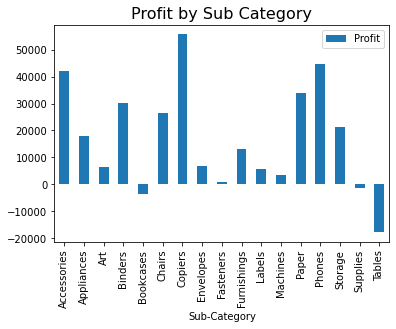

In [477]:
df.groupby(['Sub-Category'])[['Profit']].apply(sum).plot.bar();
plt.title("Profit by Sub Category",fontsize=16);

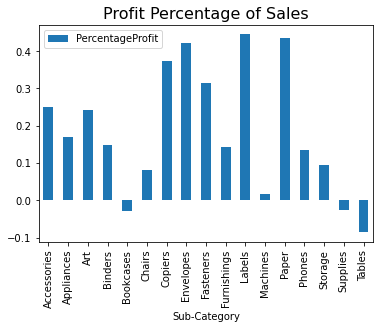

In [478]:
hh.groupby(['Sub-Category'])[['PercentageProfit']].apply(sum).plot.bar();
plt.title("Profit Percentage of Sales",fontsize=16         );

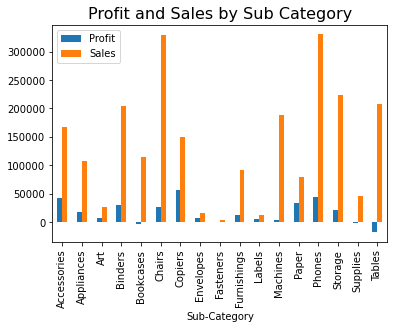

In [479]:
df.groupby(['Sub-Category'])[['Profit','Sales']].apply(sum).plot.bar();
plt.title("Profit and Sales by Sub Category",fontsize=16         );

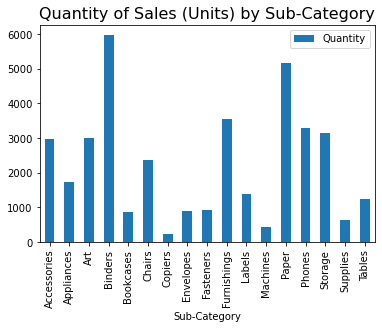

In [480]:
df.groupby(['Sub-Category'])[['Quantity']].apply(sum).plot.bar();
plt.title("Quantity of Sales (Units) by Sub-Category",fontsize=16);

## Question 2: What would the sales performace be without discounts?

A Correlation Heatmap will show the relationship between numeric fields

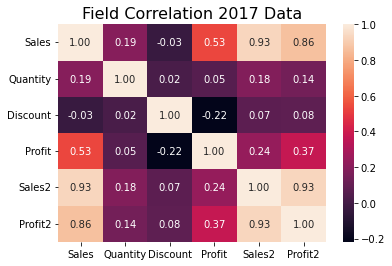

In [481]:
sns.heatmap(Data2017.drop(columns =['Row ID', 'Postal Code']).corr(), annot=True, fmt=".2f");
plt.title("Field Correlation 2017 Data",fontsize=16);

There is a moderate correlation between sales and profit.
There is a srong correlation between adjusted profit2 and sales2

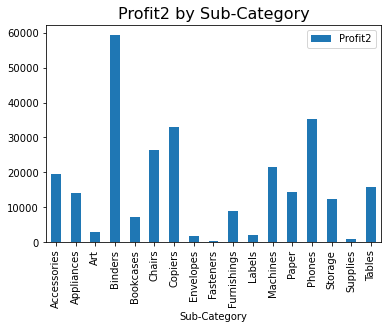

In [482]:
Data2017.groupby(['Sub-Category'])[['Profit2']].apply(sum).plot.bar();
plt.title("Profit2 by Sub-Category",fontsize=16);

In [483]:
print('Profit Comparison')
print(cc)

Profit Comparison
            Profit2      Profit      Var%
Output                                   
0       275687.9644  93439.2696  1.950451


## Question 3: What is the recomendation regarding discount policy?

At this point we will test to see how the data behaves by removing unprofitable sales transactions.

The correlation heatmap after removing the unprofitable transactions:

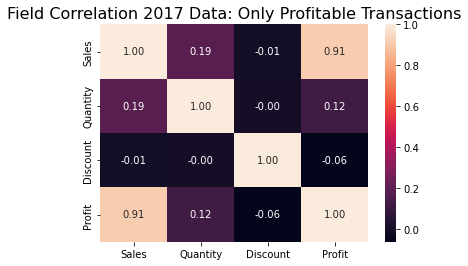

In [484]:
sns.heatmap(Data2017Profit.drop(columns =['Row ID', 'Postal Code','Sales2','Profit2']).corr(), annot=True, fmt=".2f");
plt.title("Field Correlation 2017 Data: Only Profitable Transactions",fontsize=16);

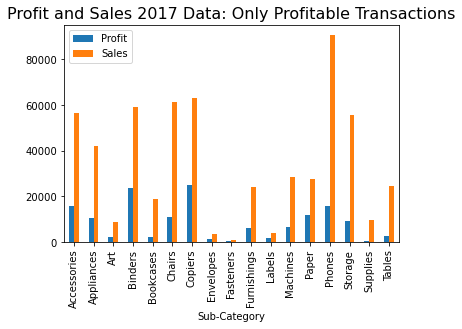

In [485]:
Data2017Profit.groupby(['Sub-Category'])[['Profit','Sales']].apply(sum).plot.bar();
plt.title("Profit and Sales 2017 Data: Only Profitable Transactions",fontsize=16);

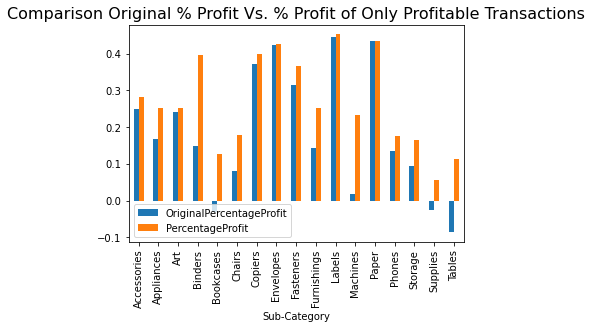

In [487]:
hhh.groupby(['Sub-Category'])[['OriginalPercentageProfit','PercentageProfit']].apply(sum).plot.bar();
plt.title("Comparison Original % Profit Vs. % Profit of Only Profitable Transactions",fontsize=16);

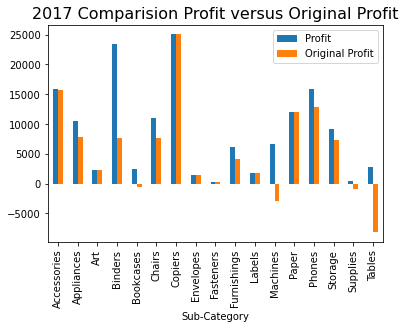

In [488]:
iii.groupby(['Sub-Category'])[['Profit','Original Profit']].apply(sum).plot.bar();
plt.title("2017 Comparision Profit versus Original Profit",fontsize=16);

In [489]:
print('Profit Comparison')
print(iiii)

Profit Comparison
            Profit  Original Profit  Variation%
Result                                         
0       147275.463       93439.2696    0.576162


In conclusion removing unprofitable transactions provides a strong correlation between sales and profit, it also would increase profit by 57.6%. As a result the recomendation is to keep providing discounts as long as the specific transaction carries a profit.

Blog can be found at the following link: https://medium.com/@rodrigojchavez/in-the-pursuit-of-profitability-885e8ef9553e